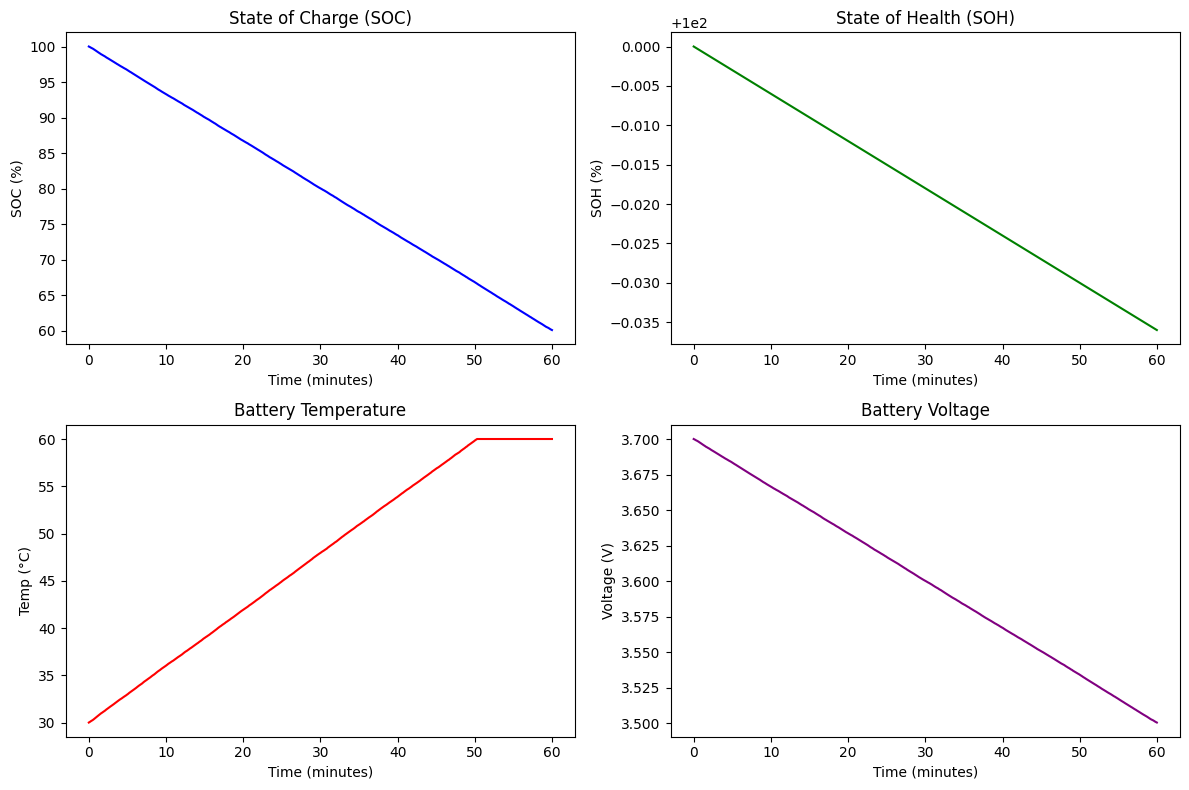

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation time (in seconds)
time = np.arange(0, 3600, 1)  # 1 hour, 1 second step

# Battery parameters
capacity_Ah = 2.5              # Battery capacity in Amp-hours
initial_SOC = 100              # Initial state of charge in %
initial_capacity = capacity_Ah
voltage_nominal = 3.7          # Nominal voltage in volts

# Random current draw between 0.5A and 1.5A for 1 hour
current_draw = np.random.uniform(0.5, 1.5, len(time))

# Initialize arrays to store results
SOC = np.zeros(len(time))
SOH = np.zeros(len(time))
temperature = np.zeros(len(time))
voltage = np.zeros(len(time))

# Constants
temp_rise_factor = 0.01                  # Temperature rise per unit current
capacity_loss_per_sec = 0.00001         # Small capacity loss over time

# Initial conditions
SOC[0] = initial_SOC
SOH[0] = 100
temperature[0] = 30
voltage[0] = voltage_nominal

# Simulation loop
for t in range(1, len(time)):
    # Coulomb counting for SOC
    SOC[t] = SOC[t-1] - (current_draw[t] / capacity_Ah) * (100 / 3600)
    SOC[t] = max(0, SOC[t])  # Avoid negative SOC

    # Simulated SOH degradation
    SOH[t] = SOH[t-1] - capacity_loss_per_sec
    SOH[t] = max(80, SOH[t])  # Limit SOH to 80%

    # Temperature simulation
    temperature[t] = temperature[t-1] + current_draw[t] * temp_rise_factor
    temperature[t] = min(60, temperature[t])  # Limit temperature rise

    # Voltage drop simulation
    voltage[t] = voltage_nominal - (1 - SOC[t] / 100) * 0.5
    voltage[t] = max(3.0, voltage[t])  # Minimum voltage

# Plotting results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time / 60, SOC, color='blue')
plt.title("State of Charge (SOC)")
plt.xlabel("Time (minutes)")
plt.ylabel("SOC (%)")

plt.subplot(2, 2, 2)
plt.plot(time / 60, SOH, color='green')
plt.title("State of Health (SOH)")
plt.xlabel("Time (minutes)")
plt.ylabel("SOH (%)")

plt.subplot(2, 2, 3)
plt.plot(time / 60, temperature, color='red')
plt.title("Battery Temperature")
plt.xlabel("Time (minutes)")
plt.ylabel("Temp (°C)")

plt.subplot(2, 2, 4)
plt.plot(time / 60, voltage, color='purple')
plt.title("Battery Voltage")
plt.xlabel("Time (minutes)")
plt.ylabel("Voltage (V)")

plt.tight_layout()
plt.show()